# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[23 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [1]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
data.isnull().sum()
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


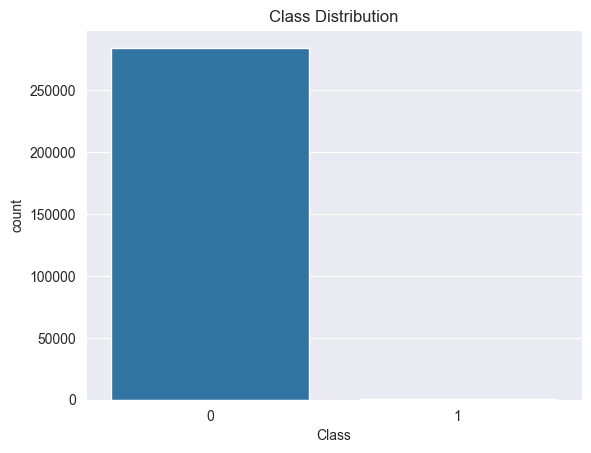

In [3]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

In [4]:
robust_scaler = RobustScaler()

data['scaled_amount'] = robust_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = robust_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time', 'Amount'], axis=1, inplace=True)

scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

In [5]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (227845, 30)
Testing data shape: (56962, 30)


In [6]:
isolation_forest = IsolationForest(n_estimators=100, max_samples='auto',
                                   contamination=float(len(y_train[y_train == 1])) / len(y_train),
                                   random_state=42)

isolation_forest.fit(X_train)

y_pred_train = isolation_forest.predict(X_train)
y_pred_test = isolation_forest.predict(X_test)

y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

print("Isolation Forest Classification Report:")
print(classification_report(y_test, y_pred_test))

Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.34      0.32        98

    accuracy                           1.00     56962
   macro avg       0.65      0.67      0.66     56962
weighted avg       1.00      1.00      1.00     56962



In [7]:
oneclass_svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)

X_train_norm = X_train[y_train == 0]
oneclass_svm.fit(X_train_norm)

y_pred_test = oneclass_svm.predict(X_test)

y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

print("One-Class SVM Classification Report:")
print(classification_report(y_test, y_pred_test))

One-Class SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.89      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.92      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [13]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=float(len(y_train[y_train == 1])) / len(y_train))

y_pred_train = lof.fit_predict(X_train)
y_pred_test = lof.fit_predict(X_test)

y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

print("Local Outlier Factor Classification Report:\n")
print(classification_report(y_test, y_pred_test))

Local Outlier Factor Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.02      0.02      0.02        98

    accuracy                           1.00     56962
   macro avg       0.51      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962



In [9]:
X_train_ae = X_train[y_train == 0].values 
X_test_ae = X_test.values

X_train_tensor = torch.tensor(X_train_ae, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_ae, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor)
test_dataset = TensorDataset(X_test_tensor)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 14),
            nn.ReLU(),
            nn.Linear(14, 7),
            nn.ReLU(),
            nn.Linear(7, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 7),
            nn.ReLU(),
            nn.Linear(7, 14),
            nn.ReLU(),
            nn.Linear(14, input_dim),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

input_dim = X_train_tensor.shape[1]
model = Autoencoder(input_dim)

In [10]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data in train_loader:
        inputs = data[0]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.6f}')

Epoch [1/20], Loss: 1.303331
Epoch [2/20], Loss: 1.231916
Epoch [3/20], Loss: 1.223227
Epoch [4/20], Loss: 1.219853
Epoch [5/20], Loss: 1.217573
Epoch [6/20], Loss: 1.215810
Epoch [7/20], Loss: 1.214236
Epoch [8/20], Loss: 1.212736
Epoch [9/20], Loss: 1.211432
Epoch [10/20], Loss: 1.210307
Epoch [11/20], Loss: 1.209422
Epoch [12/20], Loss: 1.208747
Epoch [13/20], Loss: 1.208511
Epoch [14/20], Loss: 1.208103
Epoch [15/20], Loss: 1.207813
Epoch [16/20], Loss: 1.207619
Epoch [17/20], Loss: 1.207393
Epoch [18/20], Loss: 1.207159
Epoch [19/20], Loss: 1.206998
Epoch [20/20], Loss: 1.206896


In [12]:
model.eval()
errors = []

with torch.no_grad():
    for data in test_loader:
        inputs = data[0]
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        errors.extend(torch.mean((outputs - inputs) ** 2, dim=1).numpy())

errors = np.array(errors)
threshold = np.percentile(errors, 95) 
y_pred_ae = (errors > threshold).astype(int)

print("Autoencoder Classification Report:\n")
print(classification_report(y_test, y_pred_ae))

Autoencoder Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.87      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.91      0.52     56962
weighted avg       1.00      0.95      0.97     56962



### Висновки:
Для нашого набору даних найефективнішим виявився метод Isolation Forest. Він показав високу точність і хороші показники Precision, Recall та F1-score у виявленні шахрайських транзакцій. Він також ефективно ізолював аномальні спостереження через свою здатність будувати випадкові дерева ізоляції і стійкість до великої кількості даних , а також не вимагає припущень щодо розподілу даних.

Аналіз роботи методів на датасеті - Credit Card Fraud Detection:

    1. Isolation Forest працює ефективно на великих наборах даних з дисбалансом класів, оскільки він випадковим чином підрозділяє дані, ізолюючи аномалії, які потребують меншої кількості підрозділів для ізоляції.
    2. One-Class SVM показав меншу продуктивність, через те що має чутливістю до розміру даних та дисбалансу класів. Великі обсяги даних ускладнюють побудову гіперплощини, яка ефективно розділяє нормальні дані від аномалій, а через дисбаланс класів вона перенавчається на нормальних даних.
    3. Local Outlier Factor (LOF) не зміг ефективно знайти аномалії. Можливо через те, що LOF є біляше для локальної щільності даних. У випадку шахрайських транзакцій, аномалії можуть не утворювати щільні локальні кластери, що ускладнює їх виявлення цим методом.
Оцінка можливостей використання автоенкодерів:

    1. Автоенкодер, реалізований за допомогою PyTorch, показав досить непогані результати, а також хорошу здатність виявляти аномалії на основі помилки реконструкції. Модель навчилася відтворювати патерни нормальних транзакцій, а будь-які значні відхилення коли була реконструкція вказувала про можливі аномалії.
    
    2. Автоекодери є дуже корисним у датасетах з великою кількістю даних з прихованими патернами, характерними для аномалій через те, що можуть захоплювати складні нелінійні взаємозв'язки між ознаками
    
    3. Їх використання є хорошим варіантом для задач виявлення аномалій, особливо коли у нас великий обсяг даних для навчання. Але також потрібно враховувати, що нам потрібно використовувати вельку кількість обчислювальних ресурсів, а також ретельноЇ настройки гіперпараметрів для нашої моделі, щоб отримати оптимальних результатів.
